# K-means

## Import library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import seaborn as sns

## K-means class

In [5]:
class KMeans_(object):
    """A simple example of K-means clustering"""

    def __init__(self, n_clusters=2, max_iter=300, random_init=False, seed=0):

        """constructor
        Args:
            n_clusters (int): cluster number
            max_iter (int): max iterations
            random_init (bool): random initialize or not
            seed (int): random seed
        """

        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_init = random_init
        self.seed = seed

        self.cluster_centers_ = None

    # クラスタリング
    def clustering(self, features, centroids):

        """clustering

        Args:
            features (numpy.ndarray): feature vectors
            centroids (numpy.ndarray): initial centroids

        Returns:
            label (numpy.ndarray): labels
        """
        
        # セントロイドの初期値となる候補をクラスタ数だけランダムに選ぶ
        np.random.seed(self.seed)                                   # random seed
        feature_indexes = np.arange(len(features))
        np.random.shuffle(feature_indexes)
        initial_centroid_indexes = feature_indexes[:self.n_clusters]
        random_cluster_centers = features[initial_centroid_indexes]

        # ラベル，セントロイドの初期化
        label = np.zeros(len(features))
        new_label = np.zeros(len(features))
        centroids = random_cluster_centers if self.random_init == True else centroids


        # クラスタリングのアップデート
        for _ in range(self.max_iter):
            
            # 各特徴ベクトルから最短距離となるセントロイドを基準に新しいラベルをつける
            new_label = np.array([
                np.array([
                    self._euclidean_distance(p, centroid) # 特徴量ベクトルとの距離
                    for centroid in centroids             # centroid を一つ取ってくる
                ]).argmin()                               # 距離最小を実現する centroid のインデックスを返す
                for p in features                         # 特徴量ベクトルすべてについて実行
            ])


            # 各クラスタごとの重心を計算する
            self.cluster_centers_ = np.array([features[new_label == i].mean(axis=0)
                                              for i in range(self.n_clusters)])
            
            # セントロイドを更新
            centroids = self.cluster_centers_

            if np.all(new_label == label):
                # 更新前と内容を比較して、もし同じなら終了
                break

            label = new_label

        return label

    # ユークリッド距離の計算
    def _euclidean_distance(self, p0, p1):
        return np.sum((p0 - p1) ** 2)    

In [6]:
def clustering_plot(features,centroids,n_clusters=3,max_iter=100,random_init=True,seed=0,file_name='clusteringplot.png',dpi=150):
    """クラスタリングしてプロットする
    Args:
        n_clusters (init): クラスタ数
        max_iter (init): イタレーション(ループ)回数
        features (np.array): 特徴量
        centroids (np.array): 初期セントロイド
    """

    # クラスタリングする
    kms = KMeans_(n_clusters=n_clusters,max_iter=max_iter,random_init=random_init,seed=seed)
    label = kms.clustering(features,centroids)

    # クラスタごとに色付けして表示する
    plt.scatter(X[:,0], X[:,1], s=20, c=label, cmap='brg', marker='o')

    # セントロイドの表示
    centers = kms.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], s=100,
                c='red',marker='*')
    plt.gca().set_aspect('equal', adjustable='box')
#    plt.axis('equal')
    plt.savefig(file_name,dpi=dpi)

    plt.show()

In [7]:
def clustering_plot_demo(features,centroids,n_clusters=3,max_iter=100,random_init=True,file_name='sample.png',dpi=150,disp_centroid0=True,disp_centroid=True,cluster_color=True):
    """クラスタリングしてプロットする(デモ用)
    Args:
        n_clusters (init): クラスタ数
        max_iter (init): イタレーション(ループ)回数
        features (np.array): 特徴量
        centroids (np.array): 初期セントロイド
        file_name (char): 保存する画像のファイル名
        dpi (init): 保存する画像の解像度
        disp_centroid0 (bool): 更新前のセントロイドを描くか
        disp_centroid (bool): セントロイドを描くか
        cluster_color (bool): クラスタを色分けするか
    """

    # クラスタリングする
    kms = KMeans_(n_clusters=n_clusters,max_iter=max_iter,random_init=random_init)
    label = kms.clustering(features,centroids)

    # クラスタごとに色付けして表示する
    #plt.scatter(X[:,0], X[:,1], s=20, c=label, cmap='brg', marker='o')
    if cluster_color == True:
        plt.scatter(X[:,0],X[:,1],linewidths='2',c=label, cmap='brg',marker='o',s=150)
    else:
        plt.scatter(X[:,0],X[:,1],linewidths='2',c='#aaaaFF',marker='o',edgecolors='b',s=150)
    # セントロイドの表示
    centers = kms.cluster_centers_
    if disp_centroid == True: 
        plt.scatter(centers[:, 0], centers[:, 1], s=300,
                c='red',edgecolors='black',linewidths='1',marker='*')
    # 更新前のセントロイドの表示
    centers0 = centroids
    if disp_centroid0 == True:
        plt.scatter(centers0[:, 0], centers0[:, 1], s=300,
                c='yellow',edgecolors='black',linewidths='1',marker='*')

    plt.gca().set_aspect('equal', adjustable='box')

    sns.set_style("white")

    sns.despine()
    plt.savefig(file_name,dpi=dpi)

    plt.show()
    
    return kms.cluster_centers_

## 染みクラスタ

In [8]:
def make_blob_points(n=300, clusters=3, sigma=0.8, seed=0):
    """染みクラスタのデータを作る関数
    Args:
        n (int): number of points
        clusters (int): number of clusters
        sigma (float): variance
        seed (int): random seed
        
    Returns:
        X (ndarray): 作成した乱数データ
    """
    
    X,y=make_blobs(n_samples=n,         # サンプル点数
               n_features=2,            # 特徴量の次元数
               centers=clusters,        # クラスタの個数
               cluster_std=sigma,       # クラスタ内の標準偏差 
               shuffle=True,            # サンプルをシャッフル
               random_state=seed)
    
    return X

In [9]:
def plot_data(X,file_name='plotdata.png',dpi=150):
    """データの表示
    Args:
        file_name (char): file name
        dpi (init): dpi
    """
    
    plt.scatter(X[:,0],X[:,1],c='gray',marker='o',s=20)
#    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(file_name,dpi=dpi)
    plt.show()

### アルゴリズム

#### データセット

In [7]:
X = make_blob_points(n=16,clusters=2,sigma=2.5,seed=1)

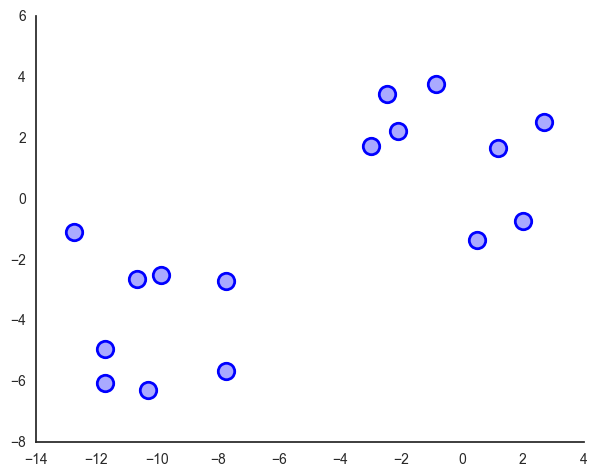

In [8]:
sns.set_style("white")
plt.scatter(X[:,0],X[:,1],linewidths='2',c='#aaaaFF',marker='o',edgecolors='b',s=140)
plt.gca().set_aspect('equal', adjustable='box')

sns.despine()
plt.savefig('sample00.png',dpi=150)
plt.show()

#### 初期セントロイドを設定

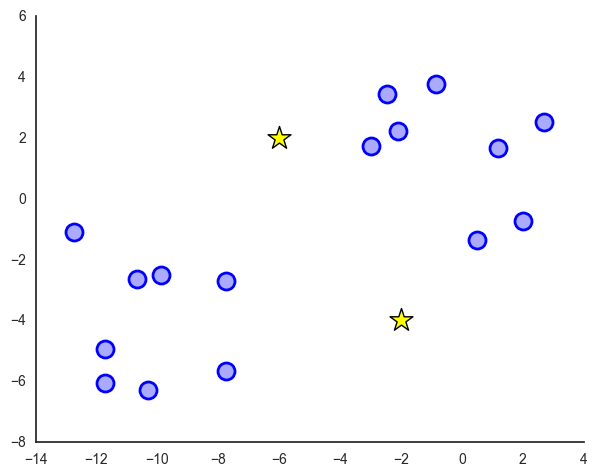

In [9]:
centroid0 = np.array([[-6.0,2.0],[-2.0,-4.0]],np.float64)
centroid1 = clustering_plot_demo(X,centroid0,n_clusters=2, max_iter=1,random_init=False,
                     disp_centroid=False,cluster_color=False,file_name='sample01.png')

#### データを一番近いセントロイドのクラスタに所属させる

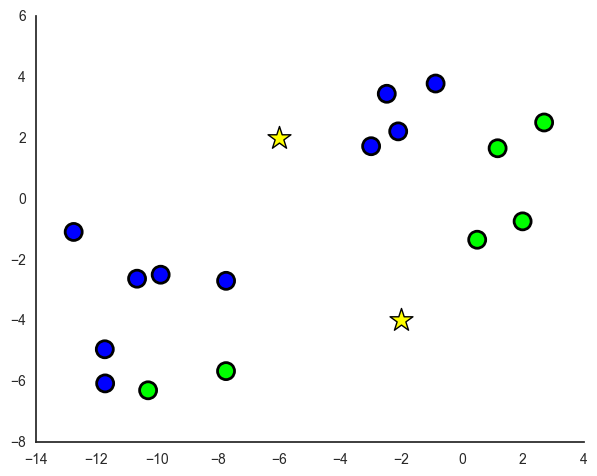

In [10]:
centroid1 = clustering_plot_demo(X,centroid0,n_clusters=2, max_iter=1,random_init=False,
                     disp_centroid=False,cluster_color=True,file_name='sample02.png')

#### クラスタ重心を計算する

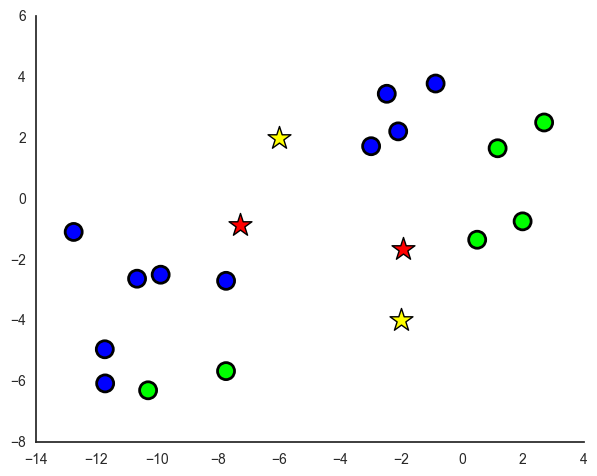

In [11]:
centroid1 = clustering_plot_demo(X,centroid0,n_clusters=2, max_iter=1,random_init=False,
                     disp_centroid=True,cluster_color=True,file_name='sample03.png')

#### セントロイドを更新

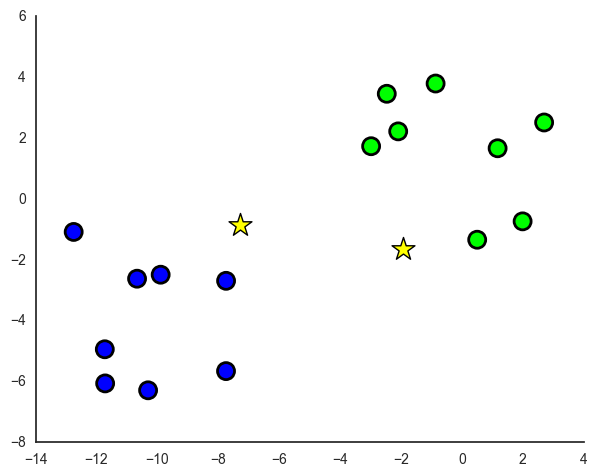

In [12]:
centroid2 = clustering_plot_demo(X,centroid1,n_clusters=2, max_iter=1,random_init=False,
                     disp_centroid=False,disp_centroid0=True,
                     cluster_color=True,file_name='sample04.png')

#### 重心の計算

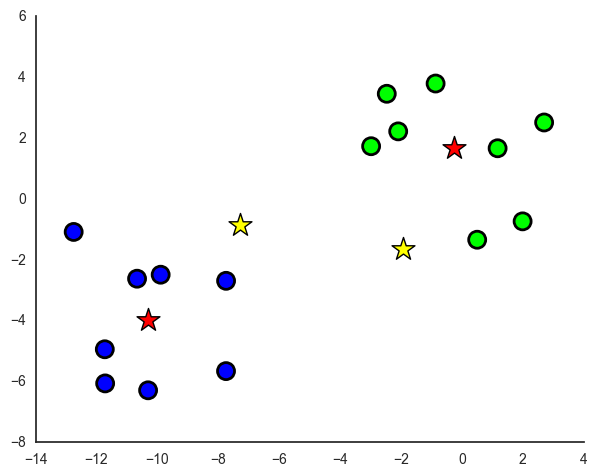

In [13]:
centroid2 = clustering_plot_demo(X,centroid1,n_clusters=2, max_iter=1,random_init=False,
                     disp_centroid=True,disp_centroid0=True,
                     cluster_color=True,file_name='sample05.png')

#### くり返す

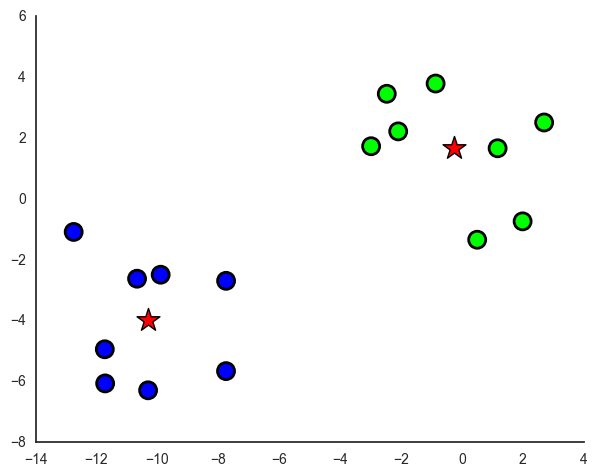

In [14]:
centroid2 = clustering_plot_demo(X,centroid1,n_clusters=2, max_iter=10,random_init=False,
                     disp_centroid=True,disp_centroid0=False,
                     cluster_color=True,file_name='sample06.png')

### 染みクラスタ

In [15]:
X = make_blob_points(n=300, clusters=3, sigma=0.8, seed=0)

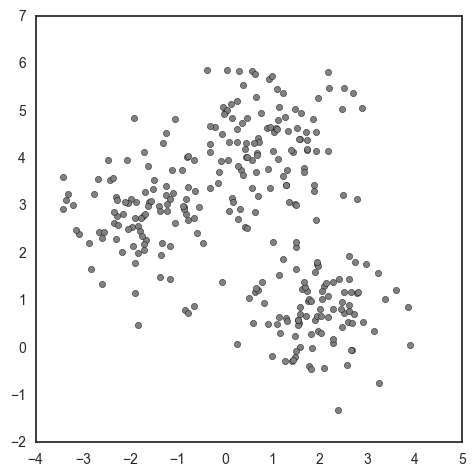

In [16]:
plot_data(X,file_name='blobpoints00.png')

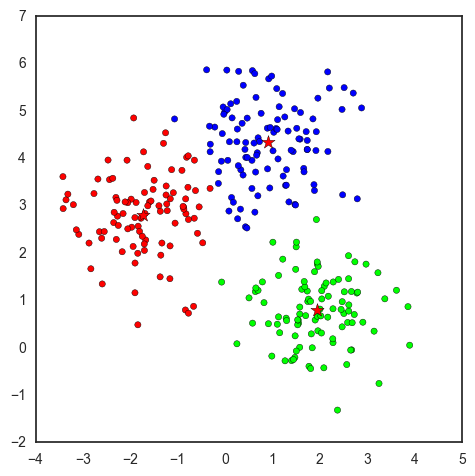

In [17]:
centroids = np.array([[-2.0,2.0],[1.0,4.0],[2.0,1.0]],np.float64)
clustering_plot(X,centroids,max_iter=100,file_name='blobpoints01.png')

### 初期値依存性

In [18]:
X1 = [[1.0,0.0],[0.0,1.0],[-1.0,0.0],[0.0,-1.0]]
X2 = [[11.0,10.0],[10.0,11.0],[9.0,10.0],[10.0,9.0]]
X = np.vstack([X1,X2])

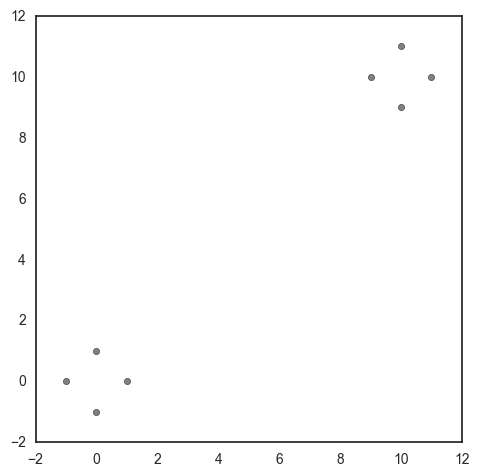

In [19]:
plot_data(X,file_name='blobpoints10.png')

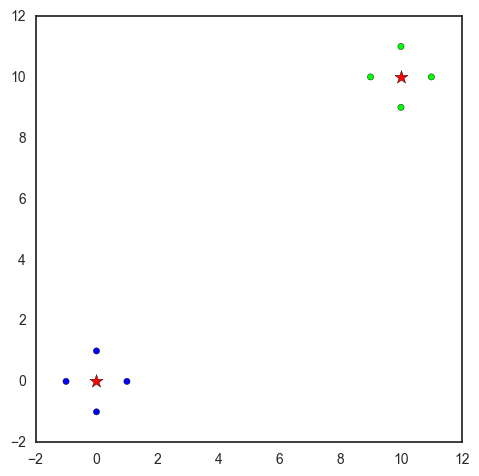

In [20]:
centroids = np.array([[0.0,9.0],[10.0,10.0]],np.float64)
clustering_plot(X,centroids,max_iter=10,n_clusters=2,random_init=False,file_name='blobpoints11.png')

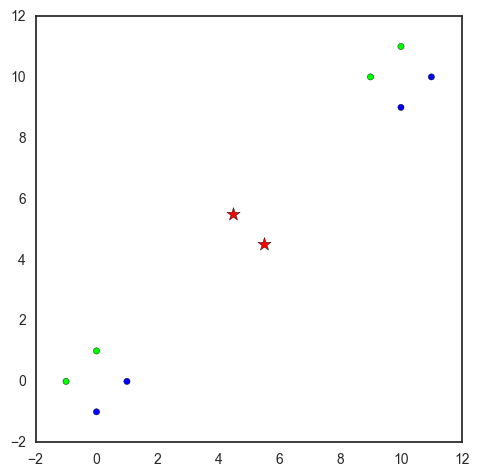

In [21]:
centroids = np.array([[11.0,9.0],[9.0,11.0]],np.float64)
clustering_plot(X,centroids,max_iter=1,n_clusters=2,random_init=False,file_name='blobpoints12.png')

## 円形一様分布 (Micky)

In [22]:
def make_disk_points(n=10, radius=1.0, center=np.array([0.0,0.0]), seed=0):
    """円形一様分布する乱数の作成
    Args:
        n (int): number of points
        radius (float): radius of the disk
        center: center of the disk
        seed (int): random seed
        
    Returns:
        X: 作成した乱数データ
    """
    np.random.seed(seed)                                   # random seed
    r = np.random.uniform(low=0, high=radius**2, size=n)   # radius
    theta = np.random.uniform(low=0, high=2*np.pi, size=n) # angle
    
    x = center[0] + np.sqrt(r) * np.cos(theta)
    y = center[1] + np.sqrt(r) * np.sin(theta)
    
    X = np.vstack([x,y]).T
    
    return X

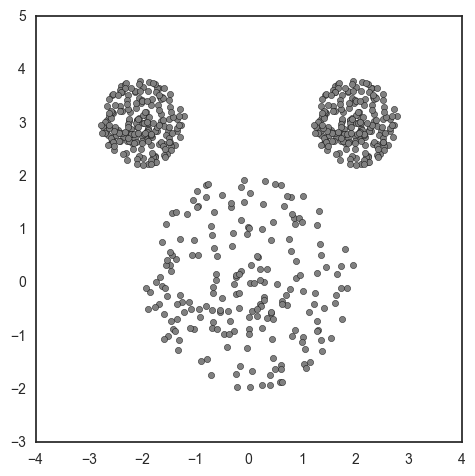

In [45]:
X1 = make_disk_points(n=200,center=np.array([0.0,0.0]), radius=2, seed=1)
X2 = make_disk_points(n=200,center=np.array([2.0,3.0]), radius=0.8, seed=1)
X3 = make_disk_points(n=200,center=np.array([-2.0,3.0]), radius=0.8, seed=1)
X = np.vstack([X1,X2,X3])

plot_data(X,file_name='mickey00.png')

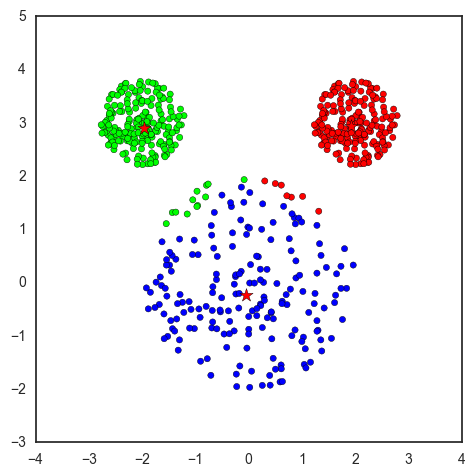

In [24]:
centroids = np.array([[0.0,0.0],[2.0,3.5],[-2.0,3.5]],np.float64)
clustering_plot(X,centroids=centroids,max_iter=10,random_init=False,file_name='mickey01.png')

#### データ数の多い所にセントロイドが引き寄せられる

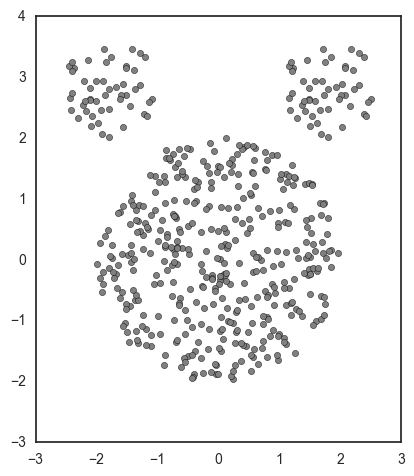

In [25]:
X1 = make_disk_points(n=400,center=np.array([0.0,0.0]), radius=2, seed=1)
X2 = make_disk_points(n=50,center=np.array([1.8,2.8]), radius=0.8, seed=1)
X3 = make_disk_points(n=50,center=np.array([-1.8,2.8]), radius=0.8, seed=1)
X = np.vstack([X1,X2,X3])

plot_data(X,file_name='mickey02.png')

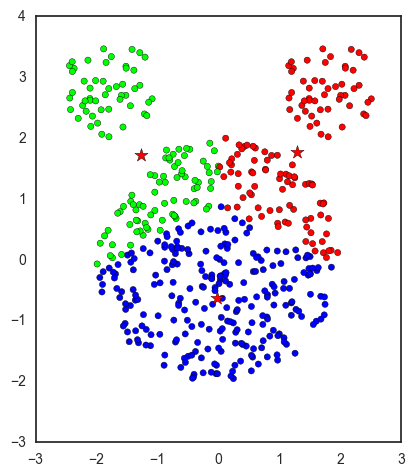

In [26]:
centroids = np.array([[0.0,0.0],[2.0,3.5],[-2.0,3.5]],np.float64)
clustering_plot(X,centroids=centroids,max_iter=10,random_init=False,file_name='mickey03.png')

### クラスタの形

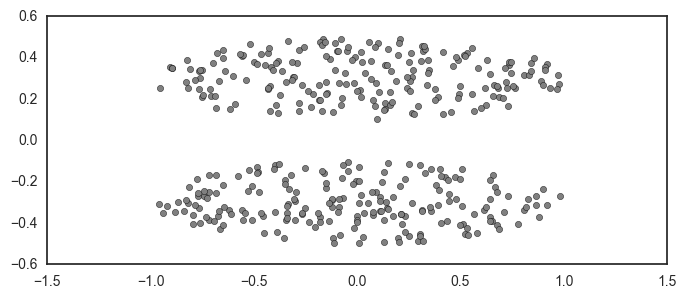

In [87]:
X1 = make_disk_points(n=200,center=np.array([0.0,1.5]), radius=1, seed=0)
X2 = make_disk_points(n=200,center=np.array([0.0,-1.5]), radius=1, seed=1)
X = np.vstack([X1,X2])
transformation=np.array([[1,0],[0,0.2]])
X = np.dot(X, transformation)
plot_data(X,file_name='elliptic00.png')

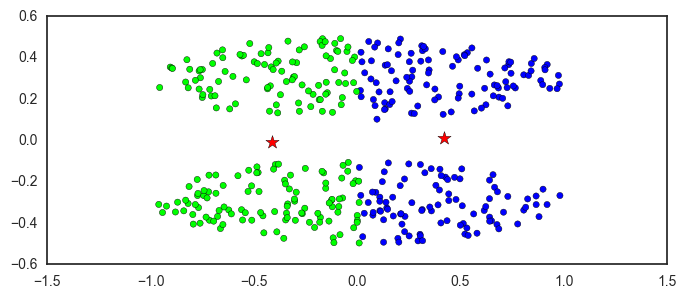

In [88]:
clustering_plot(X,centroids=None,n_clusters=2,max_iter=100,random_init=True,file_name='elliptic01.png')

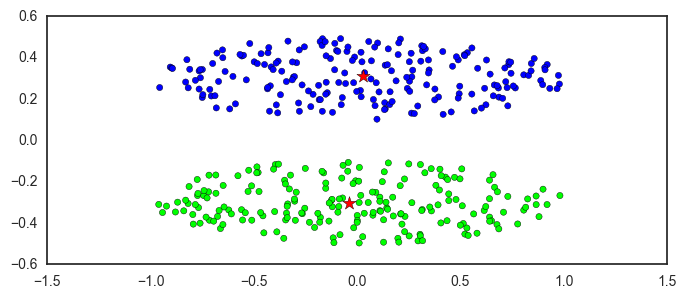

In [89]:
centroids = np.array([[0.0,0.2],[0.0,-0.3]],np.float64)
clustering_plot(X,centroids=centroids,n_clusters=2,max_iter=100,random_init=False,file_name='elliptic02.png')

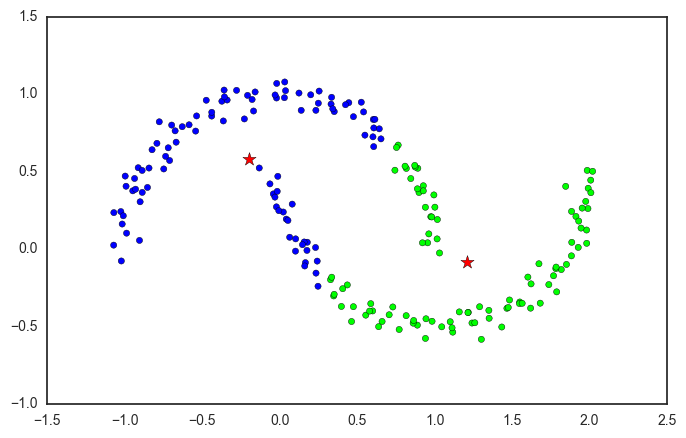

In [75]:
# データセットtwo_moons
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

clustering_plot(X,n_clusters=2,centroids=None,max_iter=100,random_init=True,file_name='moon01.png')

## 画像の減色

In [27]:
from PIL import Image

- 元の画像

In [28]:
im = Image.open('fruits_veg-m.jpg')

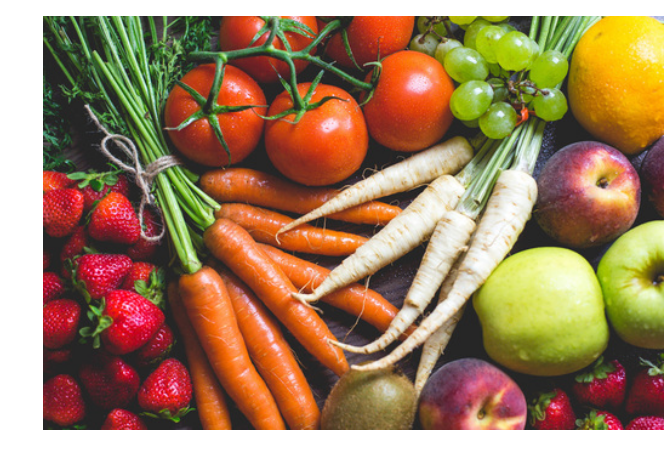

In [29]:
plt.grid(False)
plt.axis('off')
plt.imshow(im)

In [30]:
def dim_image(input_file_name, output_file_name, n_clusters=4,max_iter=10, seed=0):
    """与えられた画像をk-meansで減色して出力する
    Args:
        input_file_name (char): もとの画像ファイル名
        output_file_name (char): 出力画像ファイル名
    Returns:
        
    """
    im = Image.open(input_file_name)
    pixels=np.array(im.convert('RGB').getdata())
    # クラスタリング
    kms = KMeans_(n_clusters=n_clusters,max_iter=max_iter,random_init=True,seed=seed)
    label = kms.clustering(pixels,centroids)

    pixels_conv = kms.cluster_centers_[label] # 結果がarray([[,,],[,,],...])の形で得られる
    result=list(tuple(map(tuple,pixels_conv.astype(np.int)))) # [(,,),(,,),...]の形にする

    im.putdata(result) # 画像の更新
    plt.grid(False)
    plt.axis('off')
    plt.imshow(im)
    im.save(output_file_name)

- $k = 2$

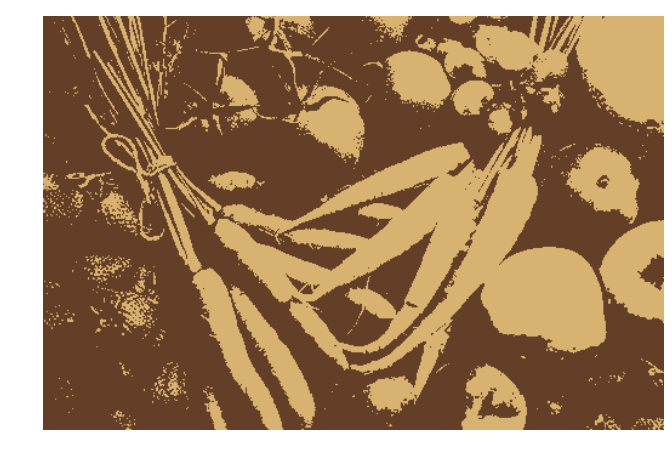

In [31]:
dim_image('fruits_veg-m.jpg', 'fruits_veg-m-k2-s0.jpg', max_iter=50, seed=0, n_clusters=2)

- $k = 3$

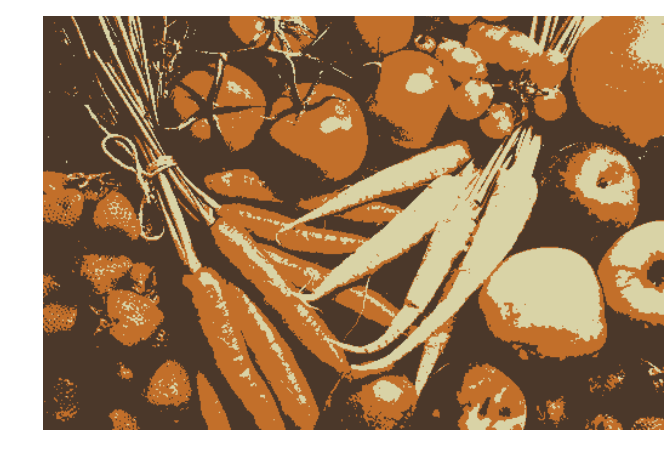

In [32]:
dim_image('fruits_veg-m.jpg', 'fruits_veg-m-k3-s0.jpg', max_iter=50, seed=0, n_clusters=3)

- $k = 4$

 __初期セントロイドを変えると結果が変ってしまう__

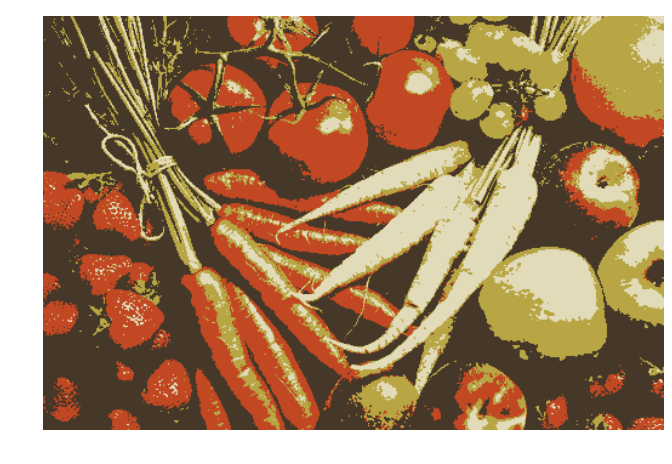

In [33]:
dim_image('fruits_veg-m.jpg', 'fruits_veg-m-k4-s0.jpg', max_iter=50, seed=0, n_clusters=4)

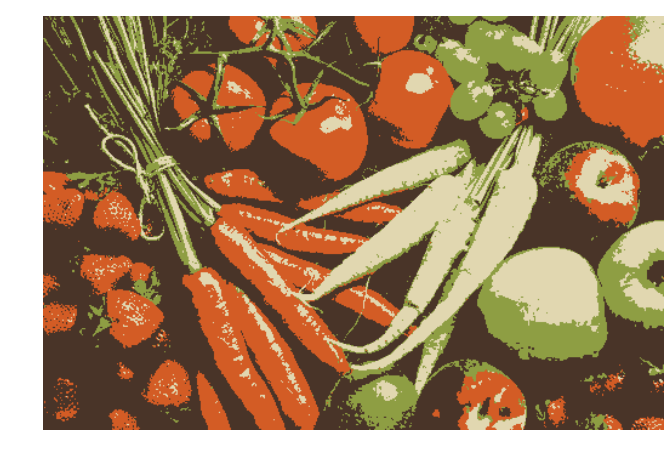

In [34]:
dim_image('fruits_veg-m.jpg', 'fruits_veg-m-k4-s2.jpg', max_iter=50, seed=2, n_clusters=4)

- $k = 8$

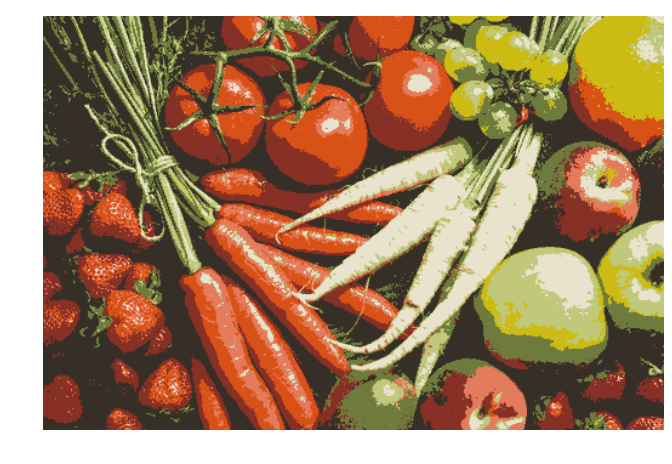

In [35]:
dim_image('fruits_veg-m.jpg', 'fruits_veg-m-k8-s0.jpg', max_iter=50, seed=0, n_clusters=8)

## K-means++

In [36]:
from sklearn.cluster import KMeans

In [37]:
def clustering_plot_pp(features,n_clusters=3,max_iter=100,seed=0,file_name='clusteringplot.png',dpi=150):
    """k-means++でクラスタリングしてプロットする
    Args:
        n_clusters (init): クラスタ数
        max_iter (init): イタレーション(ループ)回数
        features (np.array): 特徴量
    """

    # クラスタリングする
    kms = KMeans(n_clusters=n_clusters,max_iter=max_iter,init='k-means++',random_state=seed)
    label = kms.fit_predict(features)

    # クラスタごとに色付けして表示する
    plt.scatter(X[:,0], X[:,1], s=20, c=label, cmap='brg', marker='o')

    # セントロイドの表示
    centers = kms.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], s=100,
                c='red',marker='*')
    plt.gca().set_aspect('equal', adjustable='box')
#    plt.axis('equal')
    plt.savefig(file_name,dpi=dpi)

    plt.show()

In [38]:
X1 = [[1.0,0.0],[0.0,1.0],[-1.0,0.0],[0.0,-1.0]]
X2 = [[11.0,10.0],[10.0,11.0],[9.0,10.0],[10.0,9.0]]
X = np.vstack([X1,X2])

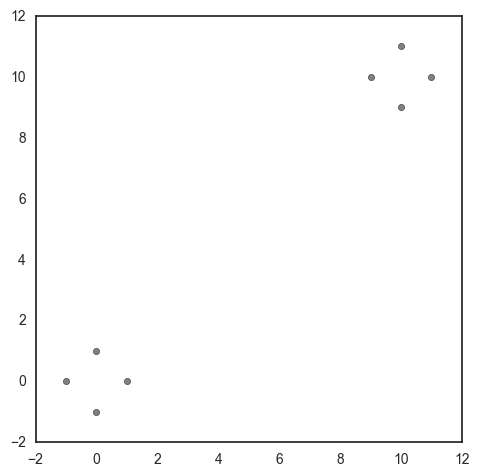

In [39]:
plot_data(X,file_name='blobpoints10.png')

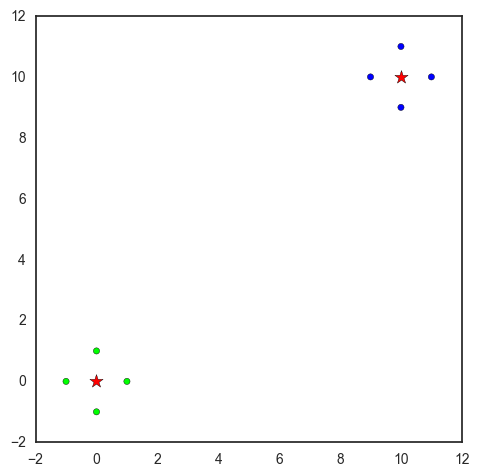

In [40]:
centroids = np.array([[11.0,9.0],[9.0,11.0]],np.float64)
clustering_plot_pp(X,max_iter=10,n_clusters=2,file_name='blobpoints11_pp.png')

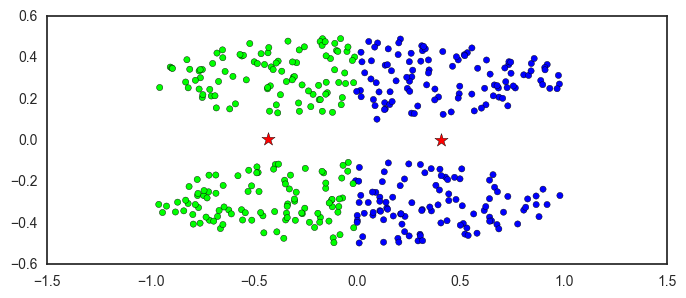

In [85]:
X1 = make_disk_points(n=200,center=np.array([0.0,1.5]), radius=1, seed=0)
X2 = make_disk_points(n=200,center=np.array([0.0,-1.5]), radius=1, seed=1)
X = np.vstack([X1,X2])
transformation=np.array([[1,0],[0,0.2]])
X = np.dot(X, transformation)

clustering_plot_pp(X,n_clusters=2,max_iter=100,file_name='elliptic11.png',seed=3)

In [41]:
def dim_image_pp(input_file_name, output_file_name, n_clusters=4,max_iter=10, seed=0):
    """与えられた画像をk-means++で減色して出力する
    Args:
        input_file_name (char): もとの画像ファイル名
        output_file_name (char): 出力画像ファイル名
    Returns:
        
    """
    im = Image.open(input_file_name)
    pixels=np.array(im.convert('RGB').getdata())
    # クラスタリング
    kms = KMeans(n_clusters=n_clusters,max_iter=max_iter,init='k-means++',random_state=seed)
    label = kms.fit_predict(pixels)

    pixels_conv = kms.cluster_centers_[label] # 結果がarray([[,,],[,,],...])の形で得られる
    result=list(tuple(map(tuple,pixels_conv.astype(np.int)))) # [(,,),(,,),...]の形にする

    im.putdata(result) # 画像の更新
    plt.grid(False)
    plt.axis('off')
    plt.imshow(im)
    im.save(output_file_name)

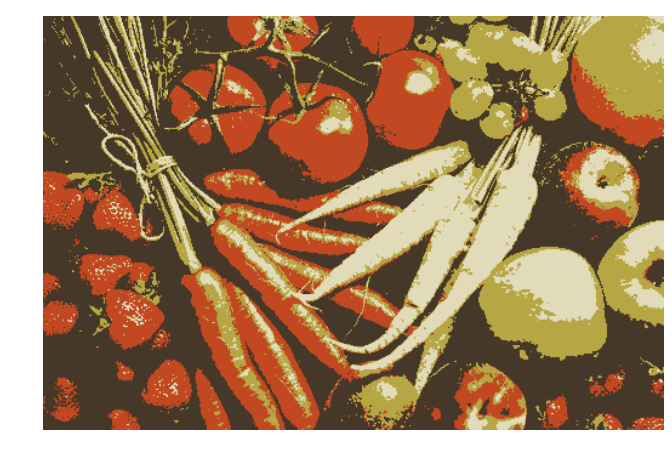

In [42]:
dim_image_pp('fruits_veg-m.jpg', 'fruits_veg-m-k4-s0_pp.jpg', max_iter=50, seed=0, n_clusters=4)

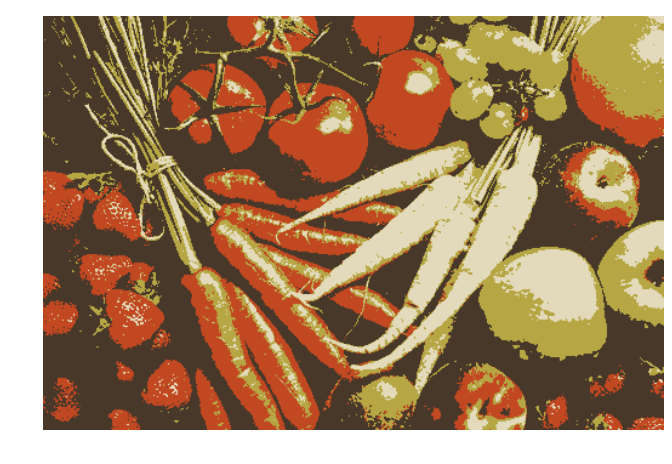

In [43]:
dim_image_pp('fruits_veg-m.jpg', 'fruits_veg-m-k4-s2_pp.jpg', max_iter=50, seed=2, n_clusters=4)